In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import numpy as np
from skimage.filters import rank

from skimage.segmentation import watershed
from skimage.morphology import disk, square
from sklearn.cluster import KMeans

In [2]:
def show(image):
  plt.figure(figsize=(20,10))
  plt.imshow(image, cmap='gray')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузим и удалим шумы с изображени

In [4]:
original_image = cv.imread('/content/drive/MyDrive/University/Computer Vision/Project/Coins/coins.png', cv.IMREAD_GRAYSCALE)

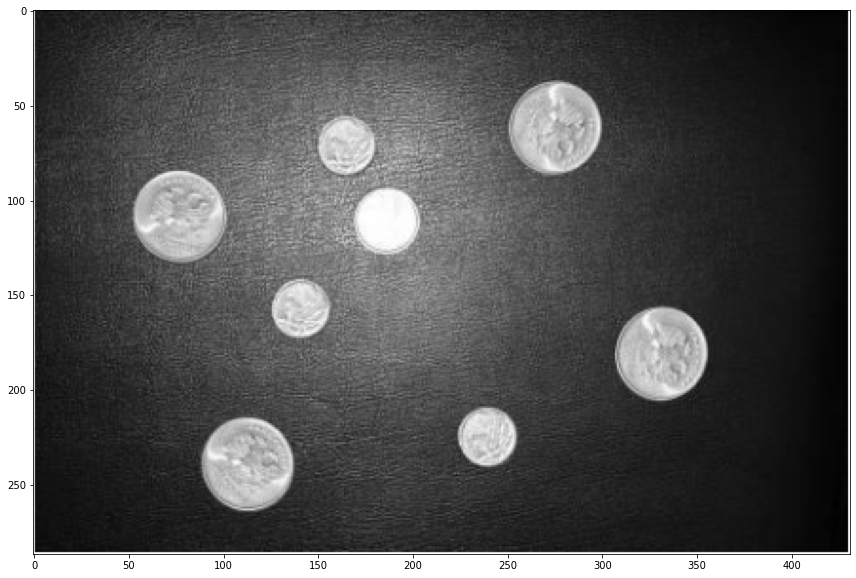

In [5]:
show(original_image)

In [6]:
image_denoised =  rank.median(original_image, disk(2))

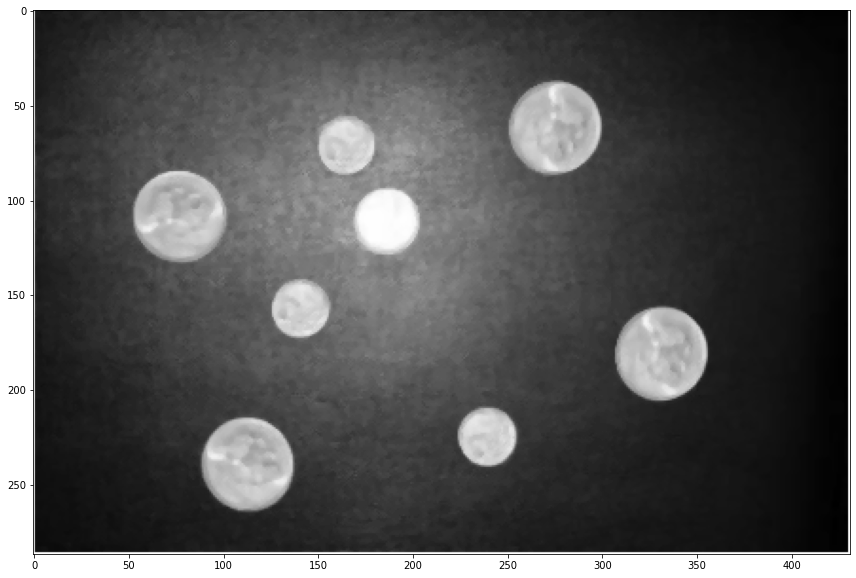

In [7]:
show(image_denoised)

# Найдем морфологический градиент


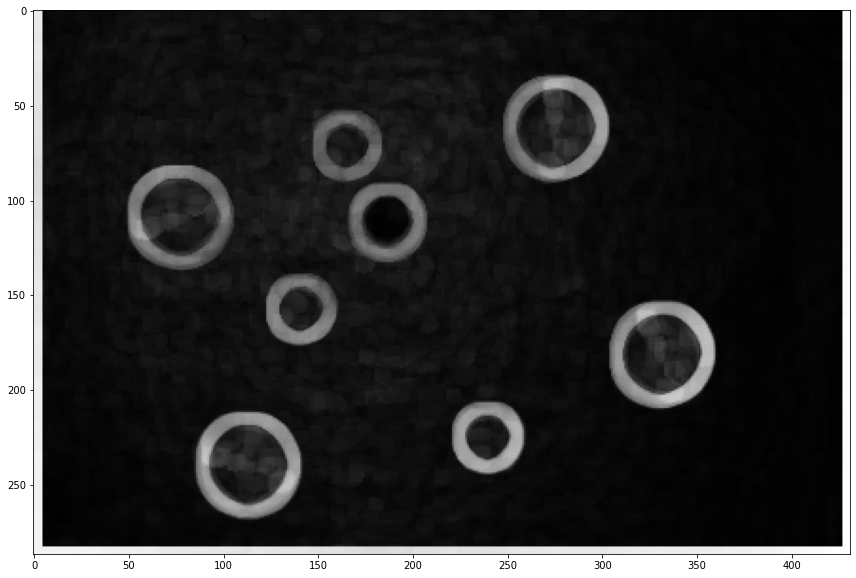

In [8]:
kernel_size = 8
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(kernel_size,kernel_size))
morph_gradient = cv.morphologyEx(image_denoised,cv.MORPH_GRADIENT,kernel)
show(morph_gradient)

Найдем маркеры

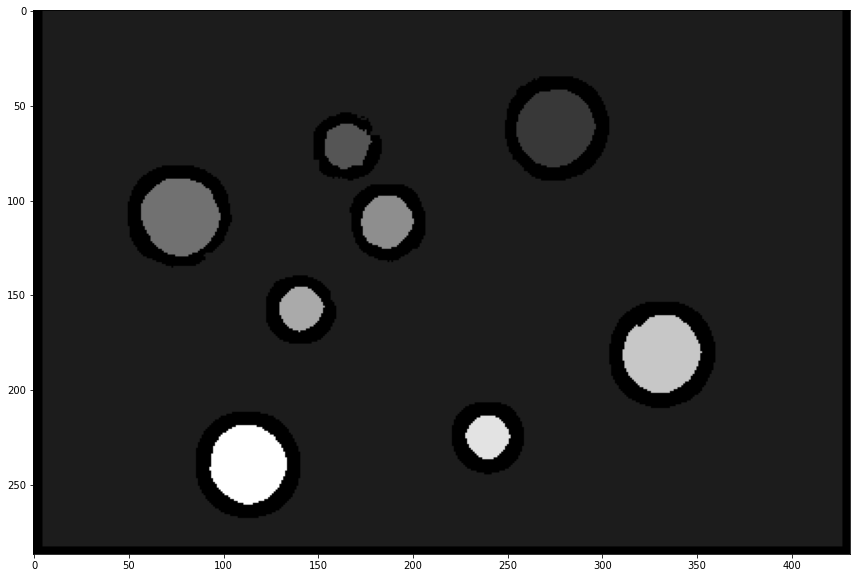

In [9]:
threshold = np.max(morph_gradient)//3
markers_prep = morph_gradient < threshold
markers = ndi.label(markers_prep)[0]
show(markers)

Запустим Watershed

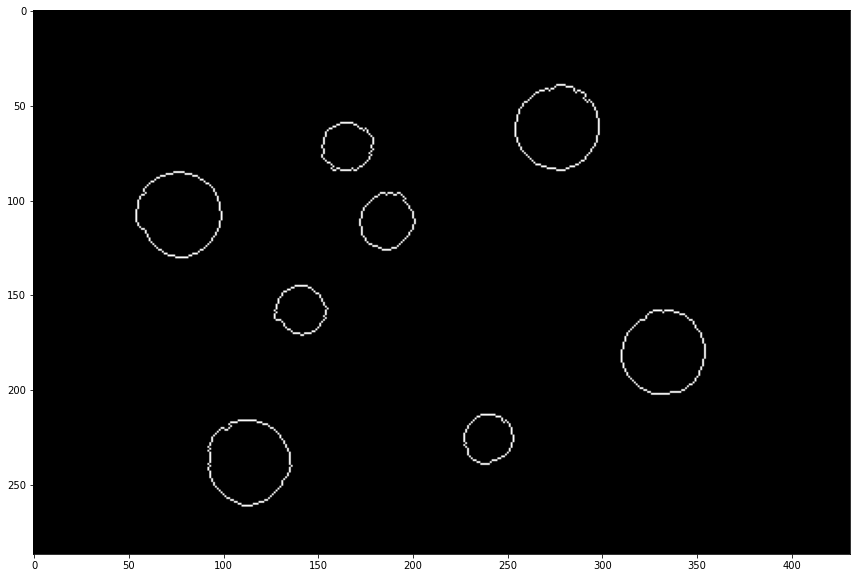

In [10]:
labels = watershed(original_image, markers, watershed_line=True)
contours = labels==0
show(contours)

считаем общее количество монет, и кол-во маленьких, больших.
Найдем количество пикселей в связных компонентах

In [11]:
res = []
for i in range(2,labels.max()+1):
    res.append(np.count_nonzero(markers[markers==i]))
res = np.array(res)
res

array([1312,  448, 1322,  593,  412, 1299,  403, 1305])

Заметим, что большие и маленькие монетки значительно отличаются по размеру. Возьмем K-means classifier

In [12]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(res.reshape(-1,1))

In [13]:
labels = np.copy(kmeans.labels_)
dict_names = {1:"маленьких", 0:"больших"}
dict_values = {1:0, 0:0}
if (kmeans.cluster_centers_[0][0] < kmeans.cluster_centers_[1][0]):
    dict1 = {0:"маленьких", 1:"больших"}

In [14]:
for i in dict_names.keys():
    dict_values[i] = np.count_nonzero([labels == i])

In [15]:
summa = 0
for i in dict_names.keys():
    print("Количество {size} монеток {value}".format(size = dict_names[i],value = dict_values[i]))
    summa += dict_values[i]

Количество маленьких монеток 4
Количество больших монеток 4


In [16]:
"Всего монеток - {value}".format(value=summa)

'Всего монеток - 8'